<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-example-data" data-toc-modified-id="Get-example-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get example data</a></span></li><li><span><a href="#Read-in-the-data" data-toc-modified-id="Read-in-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read in the data</a></span></li><li><span><a href="#Scatter" data-toc-modified-id="Scatter-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scatter</a></span><ul class="toc-item"><li><span><a href="#Documentation" data-toc-modified-id="Documentation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Documentation</a></span></li><li><span><a href="#Set-colors" data-toc-modified-id="Set-colors-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Set colors</a></span></li></ul></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Multiple-plots:-the-subplot-command" data-toc-modified-id="Multiple-plots:-the-subplot-command-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Multiple plots: the subplot command</a></span></li><li><span><a href="#Themes" data-toc-modified-id="Themes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Themes</a></span></li><li><span><a href="#Complete-Example:-From-data-to-production-plot" data-toc-modified-id="Complete-Example:-From-data-to-production-plot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Complete Example: From data to production plot</a></span></li></ul></div>

## Get example data

This dataset contains height and weight and measurements as well as
age, and gender on 507 individuals. The 247 men and 260  women were 
primarily individuals in their twenties and thirties with a  scattering
of older men and women, all exercising several hours a week.

SOURCE:

Measurements were initially taken by the first two authors - Grete 
Heinz and Louis J. Peterson - at San Jose State University and at the 
U.S. Naval Postgraduate School in Monterey, California. Later, 
measurements were taken at dozens of California health and fitness 
clubs by technicians under the supervision of one of these authors.

LINK

https://ww2.amstat.org/publications/jse/jse_data_archive.htm

VARIABLE DESCRIPTIONS: 
Columns
+ 0 Age
+ 1 Weight
+ 3 Height
+ 4 Gender

In [1]:
%matplotlib inline
from IPython.display import Image

## Read in the data

We will use numpy to read in the data into an array.

In [2]:
import pandas

data = pandas.read_csv('data/body.txt', sep='\t', header=None) 
data.columns = ['age','weight', 'height', 'gender']
data.head()

/home/dieter/anaconda3/envs/default/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,age,weight,height,gender
0,21,65.6,174.0,1
1,23,71.8,175.3,1
2,28,80.7,193.5,1
3,23,72.6,186.5,1
4,22,78.8,187.2,1


## Scatter

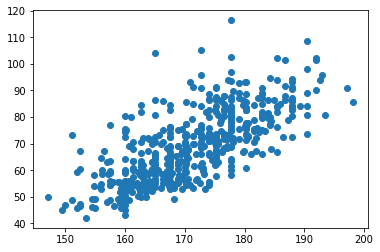

In [3]:
from matplotlib import pyplot
pyplot.scatter(data.height,data.weight);

### Documentation

    scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)

The argument c: 

    c : color, sequence, or sequence of color, optional, default: ‘b’

    c can be a single color format string, or a sequence of color specifications of length N, or a sequence of N numbers to be mapped to colors using the cmap and norm specified via kwargs (see below). Note that c should not be a single numeric RGB or RGBA sequence because that is indistinguishable from an array of values to be colormapped. c can be a 2-D array in which the rows are RGB or RGBA, however, including the case of a single row to specify the same color for all points.

This tells us, we can use the argument c color for the points. We have actually a number of options to specify the color for each point:

+ single color format string
+ sequence of color specifications of length N
+ sequence of N numbers to be mapped to colors using the cmap and norm specified via kwargs (see below)
+ a 2-D array in which the rows are RGB or RGBA

### Set colors

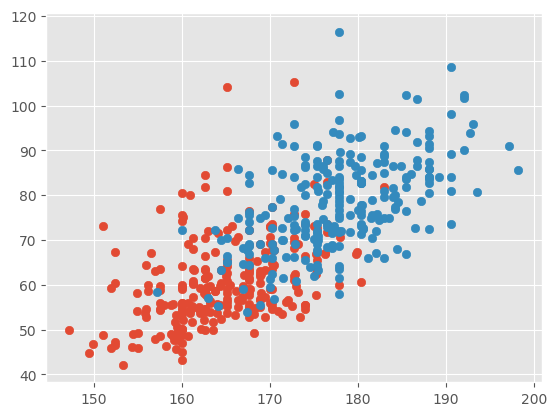

In [13]:
pyplot.style.use('default')
pyplot.style.use('ggplot')

women = data[data.gender==0]
men = data[data.gender==1]
pyplot.scatter(women.height,women.weight);
pyplot.scatter(men.height,men.weight);

## Histograms

(array([ 3.,  9., 23., 54., 44., 49., 37., 29.,  8.,  4.]),
 array([147.2 , 150.77, 154.34, 157.91, 161.48, 165.05, 168.62, 172.19,
        175.76, 179.33, 182.9 ]),
 <a list of 1 Patch objects>)

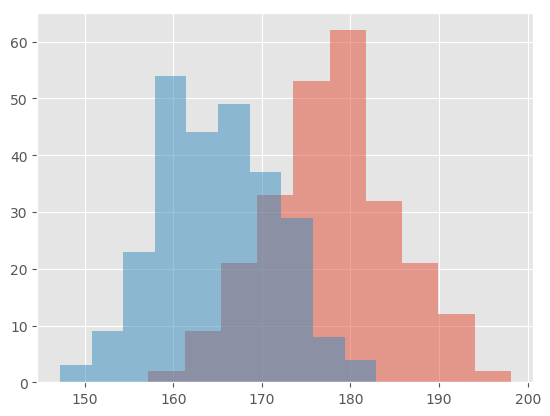

In [14]:
women = data[data.gender==0]
men = data[data.gender==1]

pyplot.hist(men.height,alpha=0.5, histtype='stepfilled');
pyplot.hist(women.height,alpha=0.5, histtype='stepfilled');

## Multiple plots: the subplot command

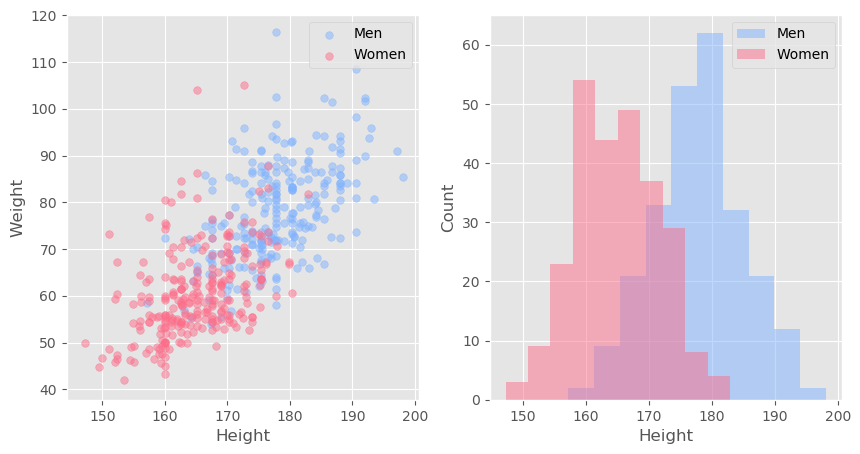

In [18]:
pyplot.figure(figsize=(10,5))

blue = '#FD6E8A'
pink = '#80B3FF'

pyplot.subplot(1,2,1)

pyplot.scatter(men.height,men.weight,c=pink,alpha=0.5, s=30)
pyplot.scatter(women.height,women.weight,c=blue,alpha=0.5, s=30)
pyplot.xlabel('Height')               
pyplot.ylabel('Weight')
pyplot.legend(['Men', 'Women'])

pyplot.subplot(1,2,2)

pyplot.hist(men.height,alpha=0.5, histtype='stepfilled',color=pink)
pyplot.hist(women.height,alpha=0.5, histtype='stepfilled',color=blue)
pyplot.xlabel('Height')               
pyplot.ylabel('Count')
pyplot.legend(['Men', 'Women'])



pyplot.savefig('graph.png', dpi=300)

## Themes

matplotlib comes with a number of style sheets that can be applied to your plots. They're listed here: https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

Obviously you can define your own style sheets, which comes in handy when you're plotting multiple graphs for a single project and want them have the same style.

(array([ 3.,  9., 23., 54., 44., 49., 37., 29.,  8.,  4.]),
 array([147.2 , 150.77, 154.34, 157.91, 161.48, 165.05, 168.62, 172.19,
        175.76, 179.33, 182.9 ]),
 <a list of 1 Patch objects>)

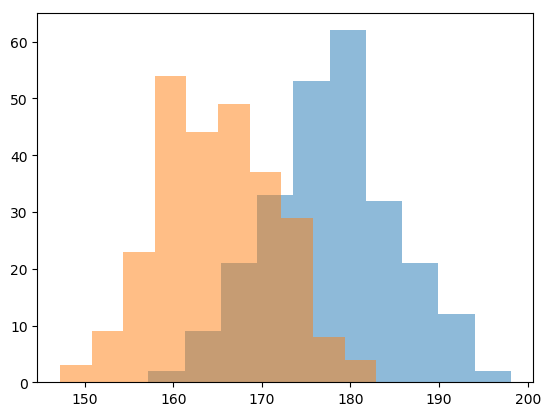

In [19]:
pyplot.style.use('default') # The only thing you need to do is switch the theme on. From then on, the defined style will be used
pyplot.hist(men.height,alpha=0.5, histtype='stepfilled')
pyplot.hist(women.height,alpha=0.5, histtype='stepfilled')

(array([ 3.,  9., 23., 54., 44., 49., 37., 29.,  8.,  4.]),
 array([147.2 , 150.77, 154.34, 157.91, 161.48, 165.05, 168.62, 172.19,
        175.76, 179.33, 182.9 ]),
 <a list of 1 Patch objects>)

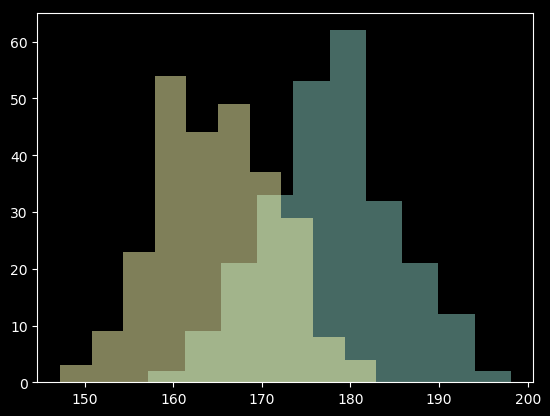

In [20]:
pyplot.style.use('default')
pyplot.style.use('dark_background') # The only thing you need to do is switch the theme on. From then on, the defined style will be used
pyplot.hist(men.height,alpha=0.5, histtype='stepfilled')
pyplot.hist(women.height,alpha=0.5, histtype='stepfilled')

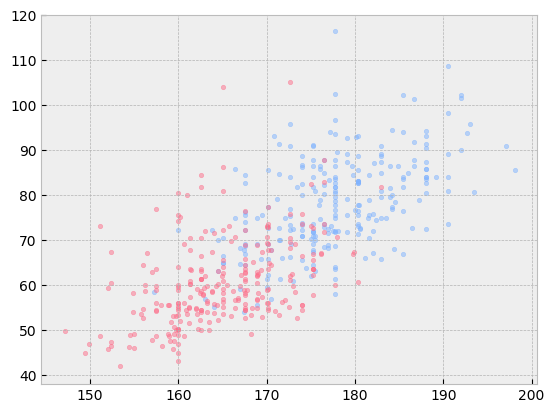

In [21]:
pyplot.style.use('default')
pyplot.style.use('bmh')

pyplot.scatter(men.height,men.weight,c=pink,alpha=0.5, s=10)
pyplot.scatter(women.height,women.weight,c=blue,alpha=0.5, s=10)

## Complete Example: From data to production plot

Let's assume we are interested in the difference in weight between men and women as a function of height.

$w_m=-61.0+0.8h$
$w_m=-61.0+0.8h$


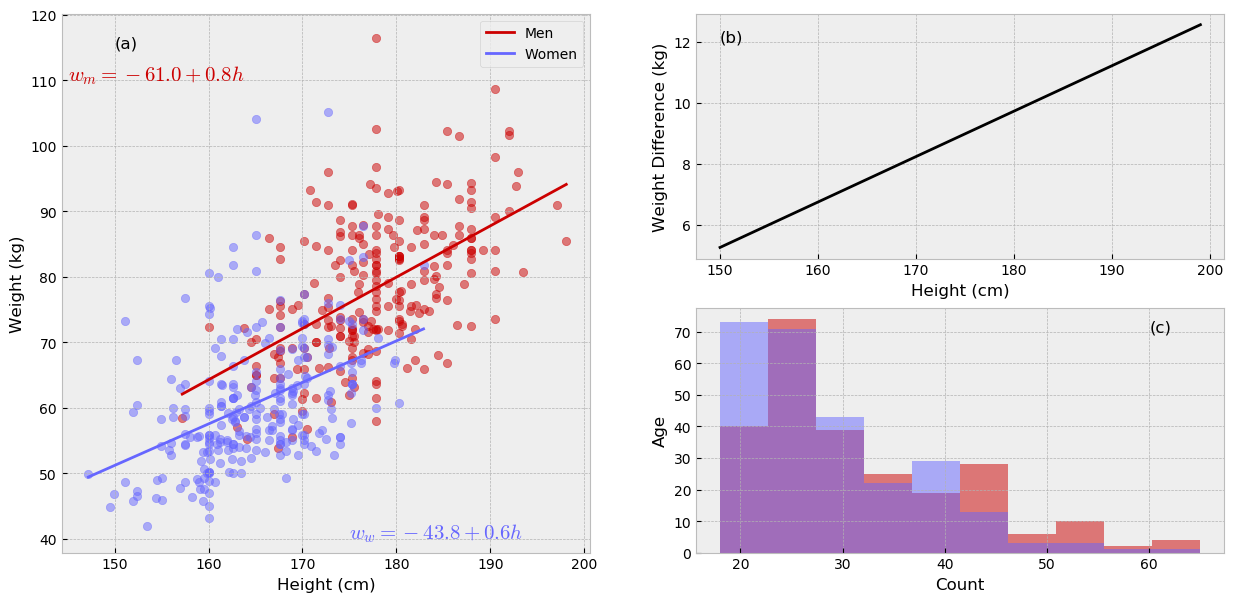

In [23]:
import numpy
import pandas

data = pandas.read_csv('data/body.txt', sep='\t', header=None) 
data.columns = ['age','weight', 'height', 'gender']

women = data[data.gender==0]
men = data[data.gender==1]

wm = men.weight
ww = women.weight
hm = men.height
hw = women.height

# Define the colors
red = "#cc0000"
blue = "#6666ff"

# Set the style and the figure size
pyplot.style.use('bmh')
pyplot.figure(figsize=(15, 7))

#Let's try this later.
#pyplot.xkcd()

# We'll make a figure with two panels
pyplot.subplot2grid((2,2), (0, 0), rowspan=2)

# fit a regression line to the men data
x = [numpy.min(hm),numpy.max(hm)]
z = numpy.polyfit(hm, wm, 1)
pm = numpy.poly1d(z)

# Make a string of the fitted equation 
eq_m = '$w_m=' + str(round(z[1],1)) + '+' + str(round(z[0],1)) + 'h$'
print(eq_m)

# Plot the data for the men
pyplot.scatter(hm,wm,color=red, alpha=0.5)
pyplot.plot(x,pm(x),'-',color=red)

# fit a regression line to the women data
x = [numpy.min(hw),numpy.max(hw)]
z = numpy.polyfit(hw, ww, 1)
pw = numpy.poly1d(z)

# Make a string of the fitted equation
eq_w = '$w_w=' + str(round(z[1],1)) + '+' + str(round(z[0],1)) + 'h$'
print(eq_m)

# Plot the women data
pyplot.scatter(hw,ww,color=blue, alpha=0.5)
pyplot.plot(x,pw(x),'-',color=blue)

# Add a legend 
pyplot.legend(['Men','Women'])

# Add the axis labels
pyplot.xlabel('Height (cm)')
pyplot.ylabel('Weight (kg)')

# Add the equations to the plot
pyplot.text(145,110,eq_m,fontsize=15,color=red)
pyplot.text(175,40,eq_w,fontsize=15,color=blue)

pyplot.text(150,115,'(a)',fontsize=12)

# Now start the second panel
pyplot.subplot2grid((2,2), (0, 1))

xrange = numpy.arange(150,200,1)
ym = pm(xrange)
yw = pw(xrange)
diff = ym - yw
pyplot.plot(xrange, diff,color='k')
pyplot.xlabel('Height (cm)')
pyplot.ylabel('Weight Difference (kg)')
pyplot.text(150,12,'(b)',fontsize=12)

# Now start the third panel
pyplot.subplot2grid((2,2), (1, 1))
settings = pyplot.hist(men.age,alpha=0.5,color=red)

# Reuse the bins used for the men in plotting the women
bins = settings[1]
pyplot.hist(women.age,alpha=0.5,color=blue,bins=bins)
pyplot.ylabel('Age')
pyplot.xlabel('Count')
pyplot.text(60,70,'(c)',fontsize=12)

pyplot.savefig('weight_women_men.png')

# Recreating a graph from the Economist

As an exercise, we'll try our hand at recreating the following plot from the the economist.

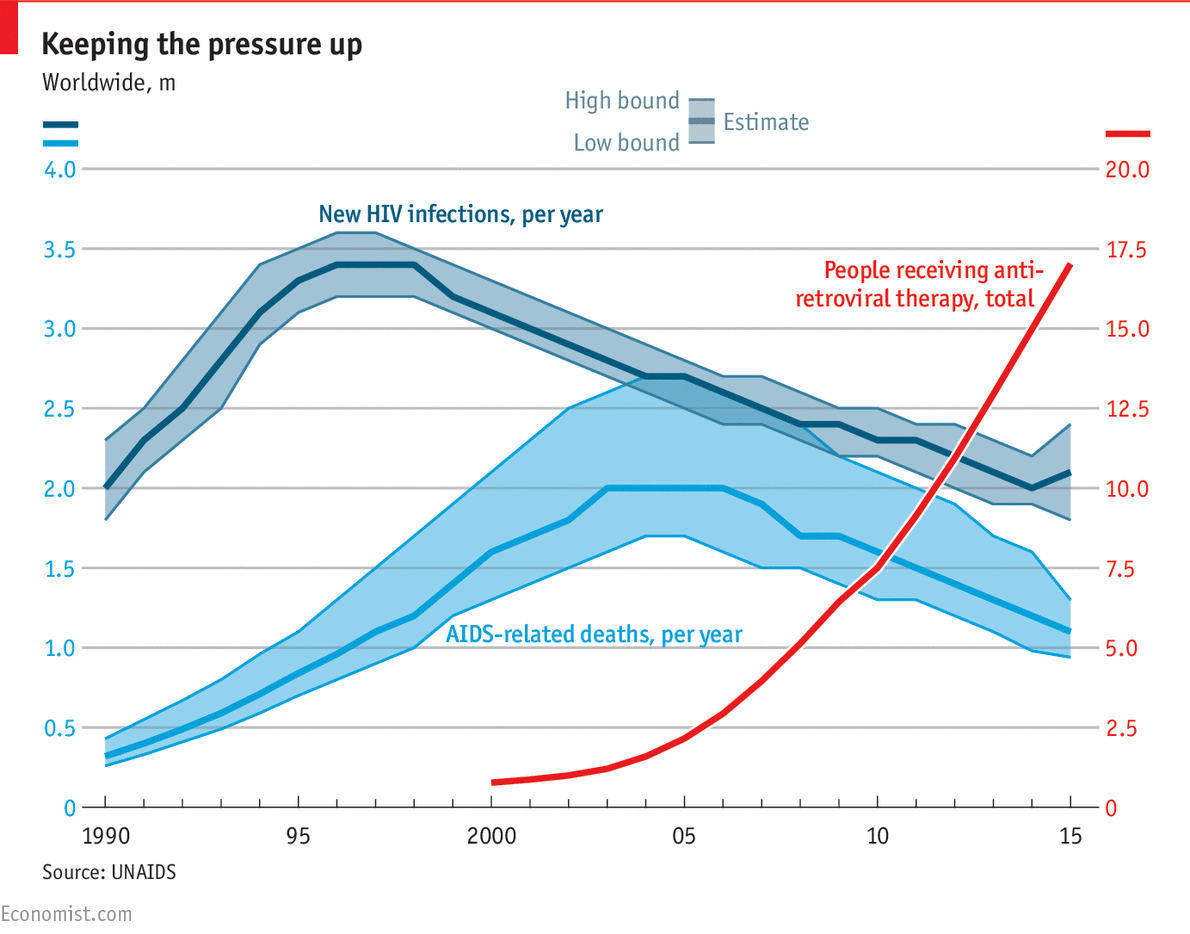

In [16]:
Image("hiv.png")